## Importing Libraries

In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, AvgPool2D, BatchNormalization, Reshape
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import pickle

## *Preprocessing*

### Preprocessing the Training Set

In [3]:
with open('traffic_dataset/data2.pickle', 'rb') as f:
    data = pickle.load(f, encoding='latin1')

In [4]:
data

{'y_test': array([25, 11, 38, ...,  8, 33, 10], dtype=uint8),
 'y_validation': array([ 9, 37, 31, ...,  5, 18,  6], dtype=uint8),
 'x_validation': array([[[[-8.13200548e-02, -1.05785601e-01, -1.35571063e-01, ...,
           -1.33438379e-01, -1.00064300e-01, -8.01314786e-02],
          [-1.00652181e-01, -1.28710032e-01, -1.57822788e-01, ...,
           -1.62547588e-01, -1.36362046e-01, -1.08473681e-01],
          [-1.25605583e-01, -1.61946893e-01, -1.91582799e-01, ...,
           -1.84833080e-01, -1.58809453e-01, -1.29200697e-01],
          ...,
          [-8.20988938e-02, -1.09976135e-01, -1.44535631e-01, ...,
           -1.41712368e-01, -6.55412525e-02,  6.91929460e-03],
          [-6.42771199e-02, -8.87806639e-02, -1.19311996e-01, ...,
           -1.14659391e-01, -1.05807483e-02,  7.35892355e-02],
          [-4.32938561e-02, -6.82745054e-02, -8.79732892e-02, ...,
           -7.85297081e-02,  5.03404289e-02,  1.38326406e-01]],
 
         [[-8.57955888e-02, -1.09240018e-01, -1.37785345

In [5]:
data['y_train'] = to_categorical(data['y_train'], num_classes=43)
data['y_validation'] = to_categorical(data['y_validation'], num_classes=43)

In [6]:
data

{'y_test': array([25, 11, 38, ...,  8, 33, 10], dtype=uint8),
 'y_validation': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'x_validation': array([[[[-8.13200548e-02, -1.05785601e-01, -1.35571063e-01, ...,
           -1.33438379e-01, -1.00064300e-01, -8.01314786e-02],
          [-1.00652181e-01, -1.28710032e-01, -1.57822788e-01, ...,
           -1.62547588e-01, -1.36362046e-01, -1.08473681e-01],
          [-1.25605583e-01, -1.61946893e-01, -1.91582799e-01, ...,
           -1.84833080e-01, -1.58809453e-01, -1.29200697e-01],
          ...,
          [-8.20988938e-02, -1.09976135e-01, -1.44535631e-01, ...,
           -1.41712368e-01, -6.55412525e-02,  6.91929460e-03],
          [-6.42771199e-02, -8.87806639e-02, -1.19311996e-01, ...,
           -1.14659391e-01, -1.05807483e

In [7]:
# Making channels come at the end
data['x_train'] = data['x_train'].transpose(0, 2, 3, 1)
data['x_validation'] = data['x_validation'].transpose(0, 2, 3, 1)
data['x_test'] = data['x_test'].transpose(0, 2, 3, 1)

In [8]:
data

{'y_test': array([25, 11, 38, ...,  8, 33, 10], dtype=uint8),
 'y_validation': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'x_validation': array([[[[-8.13200548e-02, -8.57955888e-02, -8.89664665e-02],
          [-1.05785601e-01, -1.09240018e-01, -1.12112112e-01],
          [-1.35571063e-01, -1.37785345e-01, -1.44440144e-01],
          ...,
          [-1.33438379e-01, -1.35192156e-01, -1.41125023e-01],
          [-1.00064300e-01, -1.06659241e-01, -1.13051407e-01],
          [-8.01314786e-02, -8.77720937e-02, -9.07515064e-02]],
 
         [[-1.00652181e-01, -1.08288847e-01, -1.11199073e-01],
          [-1.28710032e-01, -1.35098189e-01, -1.41694248e-01],
          [-1.57822788e-01, -1.62922800e-01, -1.73192650e-01],
          ...,
          [-1.62547588e-01, -1.67186618e-0

In [9]:
for i, j in data.items():
    if i == 'labels':
        print(i + ':', len(j))
    else: 
        print(i + ':', j.shape)

y_test: (12630,)
y_validation: (4410, 43)
x_validation: (4410, 32, 32, 3)
x_train: (86989, 32, 32, 3)
y_train: (86989, 43)
labels: 43
x_test: (12630, 32, 32, 3)


### Preprocessing the Test Set

## Building the CNN

In [10]:
filters = [3, 5, 7, 9, 11, 13] #, 15, 19, 23, 25, 31
model = [0] * len(filters)

for i in range(len(model)):
    model[i] = Sequential()
    model[i].add(Conv2D(32, kernel_size=filters[i], padding='same', activation='relu', input_shape=(32, 32, 3)))
    model[i].add(MaxPool2D(pool_size=2))
    model[i].add(Flatten())
    model[i].add(Dense(500, activation='relu'))
    model[i].add(Dense(43, activation='softmax'))
    model[i].compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.95 ** (x + epochs))
epochs = 10

h = [0] * len(model)

for i in range(len(h)):
    h[i] = model[i].fit(data['x_train'][:10000], data['y_train'][:10000],
                        batch_size=5, epochs = epochs,
                        validation_data = (data['x_validation'], data['y_validation']),
                        callbacks=[annealer])
    


Epoch 1/10
2000/2000 [==============================] - 37s 18ms/step - loss: 2.4023 - accuracy: 0.3572 - val_loss: 1.0991 - val_accuracy: 0.6816
Epoch 2/10
2000/2000 [==============================] - 36s 18ms/step - loss: 0.5368 - accuracy: 0.8637 - val_loss: 0.8522 - val_accuracy: 0.7873
Epoch 3/10
2000/2000 [==============================] - 35s 18ms/step - loss: 0.2845 - accuracy: 0.9281 - val_loss: 0.8570 - val_accuracy: 0.7855
Epoch 4/10
2000/2000 [==============================] - 35s 18ms/step - loss: 0.1647 - accuracy: 0.9568 - val_loss: 0.8252 - val_accuracy: 0.8086
Epoch 5/10
2000/2000 [==============================] - 35s 18ms/step - loss: 0.1245 - accuracy: 0.9674 - val_loss: 0.9516 - val_accuracy: 0.7973
Epoch 6/10
2000/2000 [==============================] - 35s 18ms/step - loss: 0.1007 - accuracy: 0.9737 - val_loss: 1.0002 - val_accuracy: 0.8175
Epoch 7/10
2000/2000 [==============================] - 35s 18ms/step - loss: 0.0877 - accuracy: 0.9777 - val_loss: 0.8918 -

2000/2000 [==============================] - 44s 22ms/step - loss: 0.1170 - accuracy: 0.9686 - val_loss: 1.2019 - val_accuracy: 0.7862
Epoch 8/10
2000/2000 [==============================] - 44s 22ms/step - loss: 0.0788 - accuracy: 0.9787 - val_loss: 1.7064 - val_accuracy: 0.7567
Epoch 9/10
2000/2000 [==============================] - 43s 22ms/step - loss: 0.0839 - accuracy: 0.9772 - val_loss: 1.2050 - val_accuracy: 0.8052
Epoch 10/10
2000/2000 [==============================] - 43s 22ms/step - loss: 0.0656 - accuracy: 0.9835 - val_loss: 1.4929 - val_accuracy: 0.7805


In [12]:
h

In [13]:
for i in range(len(h)):
    print('Model with filters {0:d}x{0:d}, epochs={1:d}, training accuracy={2:.5f}, \
validation accuracy={3:.5f}, validation loss={4:.5f}'.format(filters[i], epochs, max(h[i].history['accuracy']),
                                                            max(h[i].history['val_accuracy']), max(h[i].history['val_loss'])))

Model with filters 3x3, epochs=10, training accuracy=0.99280, validation accuracy=0.84422, validation loss=1.09913
Model with filters 5x5, epochs=10, training accuracy=0.98700, validation accuracy=0.83265, validation loss=1.04909
Model with filters 7x7, epochs=10, training accuracy=0.98950, validation accuracy=0.85873, validation loss=1.17432
Model with filters 9x9, epochs=10, training accuracy=0.98740, validation accuracy=0.82472, validation loss=1.36505
Model with filters 11x11, epochs=10, training accuracy=0.98280, validation accuracy=0.80590, validation loss=1.73895
Model with filters 13x13, epochs=10, training accuracy=0.98120, validation accuracy=0.80522, validation loss=1.70636


<br></br>
## Plotting Accuracy of Models

Plot the Training and Validation Accuracy of the 6 different models to determine which filter size results in the greatest accuracy (for 10 epochs)

<div style="text-decoration: underline; font-size: 16px">Changing default rc settings of matplotlib plots</div>

In [108]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 8.0) # Setting default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['font.family'] = 'Helvetica' # Set default font family

<div style="text-decoration: underline; font-size: 16px">Plotting Accuracy</div>

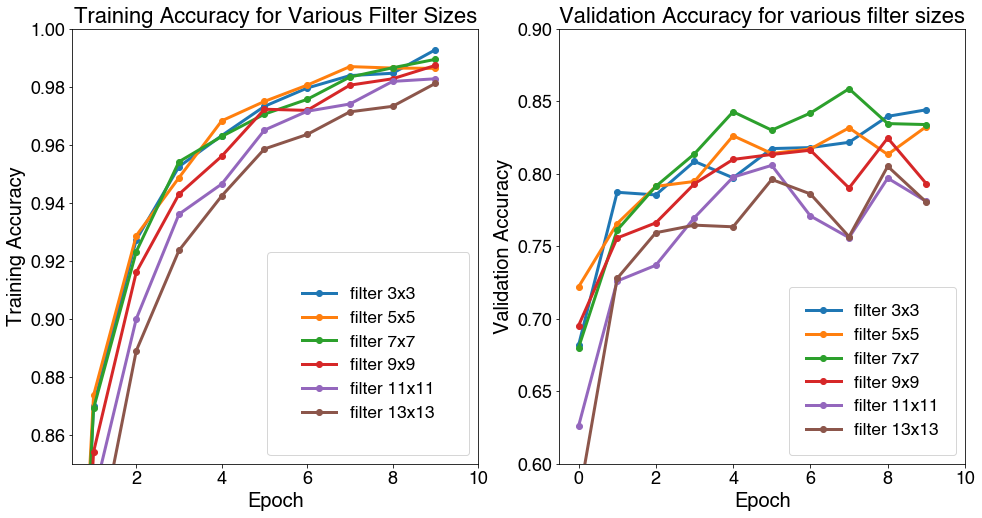

In [109]:
fig = plt.figure()

# -----plot 1: Comparing Training Accuracy Between the 6 Models-----
plt.subplot(1, 2, 1)

for i in range(len(h)):
    plt.plot(h[i].history['accuracy'], '-o', linewidth = 3)
    
plt.legend(['filter 3x3', 'filter 5x5', 'filter 7x7', 'filter 9x9', 'filter 11x11', 'filter 13x13'],
          loc = 'lower right', fontsize = 'xx-large', borderpad = 2)

plt.xlabel('Epoch', fontsize = 20)
plt.ylabel('Training Accuracy', fontsize = 20)

plt.ylim(0.85, 1.0)
plt.xlim(0.5, 10)

plt.title('Training Accuracy for Various Filter Sizes', fontsize = 22)

plt.tick_params(labelsize = 18)


# -----plot 2: Comparing Validation Accuracy Between the 6 Models-----
plt.subplot(1, 2, 2)

for i in range(len(h)):
    plt.plot(h[i].history['val_accuracy'], '-o', linewidth = 3)
    
plt.legend(['filter 3x3', 'filter 5x5', 'filter 7x7', 'filter 9x9', 'filter 11x11', 'filter 13x13'],
          loc = 'lower right', fontsize = 'xx-large', borderpad = 1)
plt.xlabel('Epoch', fontsize = 20)
plt.ylabel('Validation Accuracy', fontsize = 20)

plt.ylim(0.6, 0.9)
plt.xlim(-0.5, 10)

plt.title('Validation Accuracy for various filter sizes', fontsize = 22)

plt.tick_params(labelsize = 18)

From this we can observe that the **3x3 filter**, a.k.a model[0], attained the highest Training Accuracy (99.28%) as well as the highest Validation Accuracy (84.42%) at the end of 10 epochs. 

*Note that the 7x7 filter obtained the second highest Training Accuracy (98.95%) and, at one point, achieved the highest Validation Accuracy (85.87%) between all models after the 7th epoch, though its validation accuracy declined from this point.*

From now on, we will be using the **3x3 filter**, a.k.a model[0].

<br></br>
## Calculating Accuracy using Test Set

In [35]:
for i in range(len(model)):
    temp = model[i].predict(data['x_test'])
    temp = np.argmax(temp, axis=1)

    # We compare predicted class with correct class for all input images
    # And calculating mean value among all values of following numpy array
    # By saying 'testing_accuracy == data['y_test']' we create numpy array with True and False values
    # 'np.mean' function will return average of the array elements
    # The average is taken over the flattened array by default
    temp = np.mean(temp == data['y_test'])
    
    print('data2 filter {0:d} testing accuracy = {1:.5f}'.format(filters[i], temp))

data2 filter 3 testing accuracy = 0.83088
data2 filter 5 testing accuracy = 0.81576
data2 filter 9 testing accuracy = 0.80277
data2 filter 13 testing accuracy = 0.79826
data2 filter 15 testing accuracy = 0.77831


<br></br>
## Predicting with a Single Image from Test Set

<div style="text-decoration: underline; font-size: 16px">Changing default rc settings of matplotlib plots</div>

In [88]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10) # Setting default size of plots

In [120]:
test_num = 10

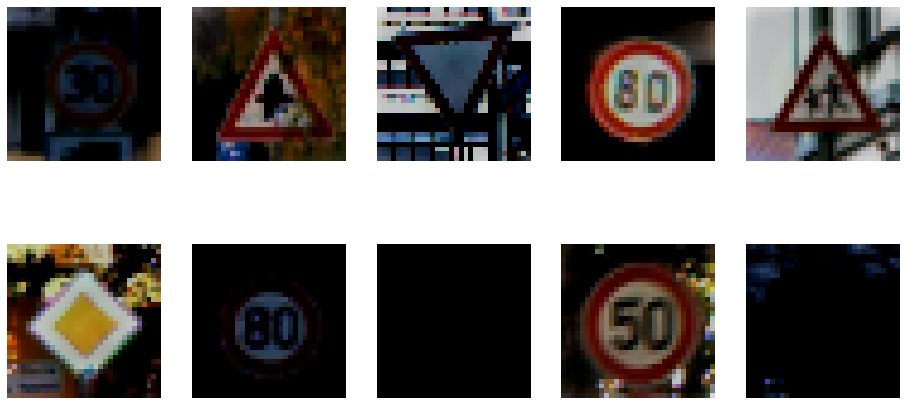

In [146]:
%%capture --no-display
indices = np.random.randint(low = 0, high = 12629, size = test_num)

x_input_lst = []
y_input_lst = []

for num, param in enumerate(indices):
    x_input = data['x_test'][param: (param + 1)]
    y_input = data['y_test'][param : (param + 1)]
    
    x_input_lst.append(x_input)
    y_input_lst.append(y_input)
    
    
    plt.subplot(2, 5, num+1)
    plt.imshow(x_input[0, :, :, :])
    plt.axis('off')
plt.show()

In [158]:
# Getting scores from forward pass of input image
scores = model[0].predict(x_input_lst[0])
print(scores[0].shape) # (43,)
print(scores) # display scores for each of the 43 possible types

(43,)
[[5.00156091e-07 9.98369634e-01 5.14542102e-04 9.92345406e-09
  7.47783361e-07 1.10598269e-03 3.74192188e-09 8.72686815e-06
  2.36930964e-09 4.22139277e-12 4.27176072e-10 1.04518005e-10
  3.91055154e-16 9.45981900e-13 1.23296297e-15 2.96864665e-13
  2.48156860e-11 6.43447917e-18 9.85608928e-10 9.44131553e-15
  4.98633854e-15 1.30931989e-18 1.42806219e-19 2.45837367e-13
  2.29148128e-14 1.03108679e-16 1.50331683e-15 5.77004265e-14
  7.80597420e-10 2.25781460e-14 2.50197113e-19 4.18425045e-10
  8.10094687e-15 8.21960044e-17 2.15387837e-15 1.12400171e-14
  2.03768599e-17 6.98171125e-18 4.22390157e-14 1.12843599e-13
  7.71232855e-09 1.29226857e-13 1.14676775e-10]]


In [131]:
# Defining function for getting texts for every class - labels
def label_text(file):
    # Defining list for saving label in order from 0 to 42
    label_list = []
    
    # Reading 'csv' file and getting image's labels
    r = pd.read_csv(file)
    # Going through all names
    for name in r['SignName']:
        # Adding from every row second column with name of the label
        label_list.append(name)
    
    # Returning resulted list with labels
    return label_list

labels = label_text('traffic_dataset/label_names.csv')

In [155]:
plt.rcParams['figure.figsize'] = (18, 10)

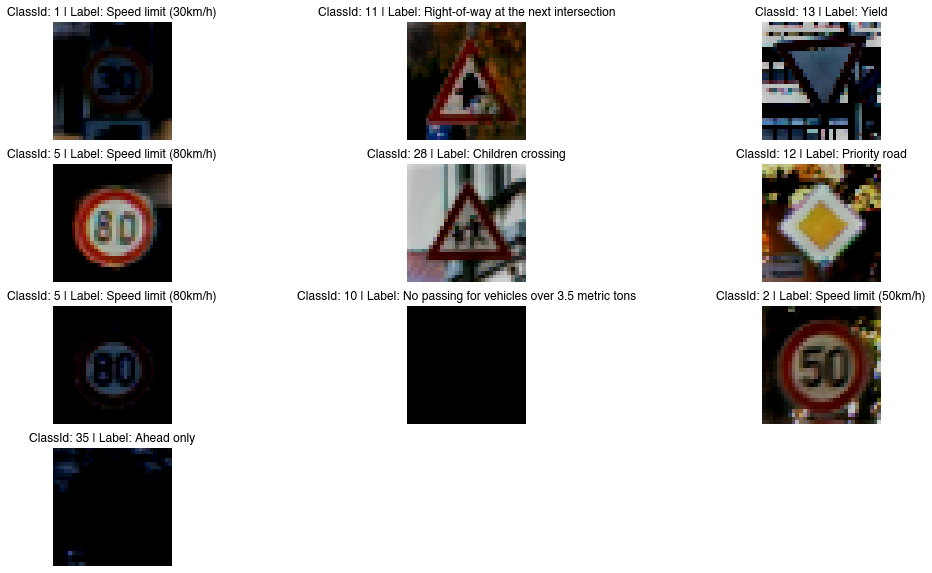

In [157]:
%%capture --no-display

classIds = []

for i in range(test_num):
    scores = model[0].predict(x_input_lst[i])
    
    prediction = np.argmax(scores)
    
    plt.subplot(4, 3, i+1)
    plt.imshow(x_input_lst[i][0, :, :, :])
    plt.axis('off')
    plt.title("ClassId: {} | Label: {}".format(prediction, labels[prediction]))
    
plt.show()

<br></br>
## Saving the Model

In [119]:
for i in range(len(model)):
    name = 'model-' + str(filters[i]) + 'x' + str(filters[i]) + '(10_epochs).h5'
    model[i].save(name)